<a href="https://colab.research.google.com/github/Wenjie0o0/ClassAI/blob/main/class04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

In [45]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
path="./content/drive/MyDrive/Colab Notebooks/cat.jpg"

In [47]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [48]:
BATCH_SIZE = 64
num_classes = 10
epochs = 10
learning_rate = 1e-4 # 0.0001

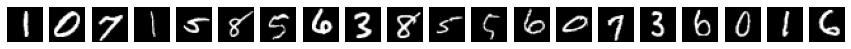

In [49]:
# Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = BATCH_SIZE, shuffle = False)
iterator = iter(train_loader)
images, labels = next(iterator)
fig, axes = plt.subplots(1,20, figsize=(15, 15))
for i in range(20):
  axes[i].imshow(images[i][0], cmap = 'gray')
  axes[i].set_axis_off()
fig.show()

In [50]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    '''
    self.conv1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.pool1=nn.MaxPool2d(2,2) #16*7*7
    self.conv3=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
    self.conv4=nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1)
    self.pool2=nn.MaxPool2d(2,2) #32*7*7
    self.fc1=nn.Linear(32*7*7,128)
    self.fc2=nn.Linear(128,10)
'''
    #sequential
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
    )
    self.fcs = nn.Sequential(
        nn.Linear(32*7*7,128),
        nn.ReLU(),
        nn.Linear(128,10)
    )
   
  def forward(self,x):
    '''
    x=F.relu(self.conv1(x))
    x=F.relu(self.conv2(x))
    x=self.pool1(x)
    x=F.relu(self.conv3(x))
    x=F.relu(self.conv4(x))
    x=self.pool2(x)
    x=x.view(-1,32*7*7)
    x=F.relu(self.fc1(x))
    output=self.fc2(x)
    return output
    '''
    x = self.conv(x)
    x = x.view(-1, 32*7*7)
    output = self.fcs(x)
    return output

In [51]:
cnn=ConvNet().to(device)
print(cnn)

ConvNet(
  (conv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fcs): Sequential(
    (0): Linear(in_features=1568, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [52]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(cnn.parameters(),lr=learning_rate)

In [53]:
total_steps = len(train_loader)
for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [64, 1, 28, 28]
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = cnn(images)
    loss = criterion(outputs, labels)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print (f'Epoch {epoch+1}, Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

Epoch 1, Step [100/938], Loss: 1.7249
Epoch 1, Step [200/938], Loss: 0.5000
Epoch 1, Step [300/938], Loss: 0.3988
Epoch 1, Step [400/938], Loss: 0.5275
Epoch 1, Step [500/938], Loss: 0.2329
Epoch 1, Step [600/938], Loss: 0.2869
Epoch 1, Step [700/938], Loss: 0.1531
Epoch 1, Step [800/938], Loss: 0.2853
Epoch 1, Step [900/938], Loss: 0.0911
Epoch 2, Step [100/938], Loss: 0.1877
Epoch 2, Step [200/938], Loss: 0.1245
Epoch 2, Step [300/938], Loss: 0.2473
Epoch 2, Step [400/938], Loss: 0.1025
Epoch 2, Step [500/938], Loss: 0.1782
Epoch 2, Step [600/938], Loss: 0.3051
Epoch 2, Step [700/938], Loss: 0.3476
Epoch 2, Step [800/938], Loss: 0.0773
Epoch 2, Step [900/938], Loss: 0.0710
Epoch 3, Step [100/938], Loss: 0.0898
Epoch 3, Step [200/938], Loss: 0.1028
Epoch 3, Step [300/938], Loss: 0.1062
Epoch 3, Step [400/938], Loss: 0.1987
Epoch 3, Step [500/938], Loss: 0.0542
Epoch 3, Step [600/938], Loss: 0.0152
Epoch 3, Step [700/938], Loss: 0.2538
Epoch 3, Step [800/938], Loss: 0.5185
Epoch 3, Ste

In [54]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = cnn(images)
    # max returns (value ,index)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 98.78 %


In [55]:
[p.numel() for p in cnn.parameters() if p.requires_grad] #計算參數量

[144, 16, 2304, 16, 4608, 32, 9216, 32, 200704, 128, 1280, 10]